In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
#load the full csv
full = pd.read_csv("fullData.csv")

In [3]:
del full['Unnamed: 0']
del full['onlinedating.1']

In [4]:
full.head()

,Year,State,Fiscal.Policy,Regulatory.Policy,Personal.Freedom,Economic.Freedom,Overall.Freedom,unemployment,beer,wine,...,chink,racism,nigger,goodbooks,onlineclass,eventsnearme,jokes,football,religion,wheretovote
0,2004,Alabama,0.083858,0.097501,-0.155371,0.181359,0.025988,5.7,1.19,0.20,...,0.00,8.000000,18.500000,3.833333,3.166667,0.0,47.750000,13.833333,36.666667,4.333333
1,2004,Alaska,-0.205665,0.076301,0.050388,-0.129364,-0.078977,7.5,1.31,0.44,...,0.00,8.500000,14.583333,7.000000,13.916667,0.0,53.583333,4.083333,35.083333,3.583333
2,2004,Arizona,-0.008760,0.188783,-0.036909,0.180022,0.143113,5.0,1.40,0.34,...,0.00,4.916667,12.416667,4.416667,5.750000,0.0,40.166667,6.250000,36.750000,6.833333
3,2004,Arkansas,-0.030705,0.102758,-0.075841,0.072053,-0.003789,5.7,1.04,0.15,...,0.00,10.416667,17.583333,17.416667,15.250000,0.0,56.083333,8.916667,39.000000,5.166667
4,2004,California,-0.117287,-0.287566,0.006635,-0.404854,-0.398219,6.2,1.07,0.52,...,2.75,19.833333,11.250000,7.750000,5.750000,0.0,29.166667,5.000000,32.333333,0.000000


## Removing columns that have values of 0

In [5]:
for col in full.columns:
    if(0 in full[col].values):
        del full[col]

In [6]:
#full['rec']
full['rec'] = full.apply(lambda row: 1 if row['Year'] in [2008,2009,2010,2011] else 0,axis=1)
#full['rec'] = full.apply(lambda row: 1 if row['Year'] > 2007 else 0,axis=1)

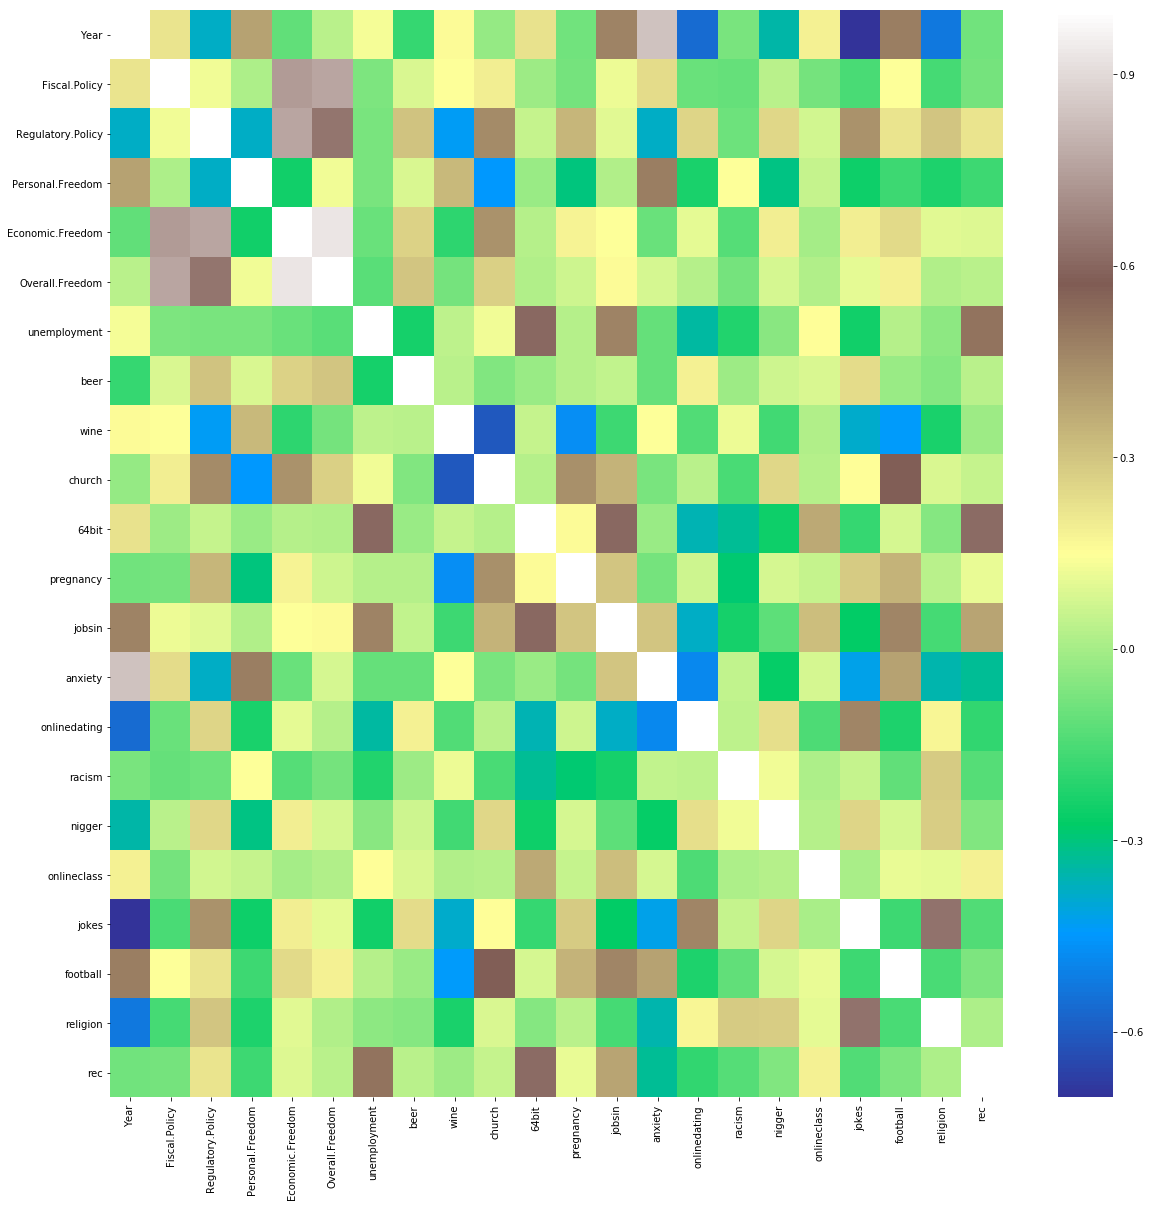

In [7]:
from matplotlib import pyplot

dims = (20, 20)
fig, ax = pyplot.subplots(figsize=dims)

#cols = [c for c in df.columns if (c.lower()[:8] != 'country_' or \
#        c == 'country_US') and 'os' not in c and 'screen' not in c and 'browser' not in c]
cols = [c for c in full.columns if (c.lower()[:8] != 'country_')]
dfCorr=full[cols]

corr = dfCorr.corr()
#Pastel1 terrain
sns.heatmap(ax=ax,data=corr,cmap="terrain")

In [8]:
full.columns

Index(['Year', 'State', 'Fiscal.Policy', 'Regulatory.Policy',
       'Personal.Freedom', 'Economic.Freedom', 'Overall.Freedom',
       'unemployment', 'beer', 'wine', 'church', '64bit', 'pregnancy',
       'jobsin', 'anxiety', 'onlinedating', 'racism', 'nigger', 'onlineclass',
       'jokes', 'football', 'religion', 'rec'],
      dtype='object')

(array([ 32.,  49.,  66., 102.,  77.,  72.,  63.,  43.,  42.,  25.,  24.,
         12.,  25.,  10.,   3.,   1.,   2.,   2.]),
 array([ 2.6       ,  3.21666667,  3.83333333,  4.45      ,  5.06666667,
         5.68333333,  6.3       ,  6.91666667,  7.53333333,  8.15      ,
         8.76666667,  9.38333333, 10.        , 10.61666667, 11.23333333,
        11.85      , 12.46666667, 13.08333333, 13.7       ]),
 <a list of 18 Patch objects>)

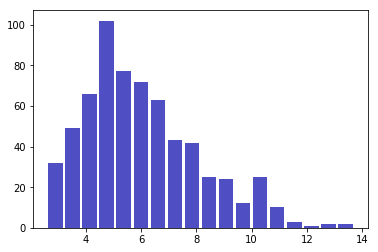

In [9]:
plt.hist(x=full['unemployment'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

In [10]:
full['highunem'] = full.apply(lambda row: 1 if row['unemployment'] > 7 else 0, axis=1)

In [11]:
full.head()

,Year,State,Fiscal.Policy,Regulatory.Policy,Personal.Freedom,Economic.Freedom,Overall.Freedom,unemployment,beer,wine,...,anxiety,onlinedating,racism,nigger,onlineclass,jokes,football,religion,rec,highunem
0,2004,Alabama,0.083858,0.097501,-0.155371,0.181359,0.025988,5.7,1.19,0.20,...,19.416667,10.750000,8.000000,18.500000,3.166667,47.750000,13.833333,36.666667,0,0
1,2004,Alaska,-0.205665,0.076301,0.050388,-0.129364,-0.078977,7.5,1.31,0.44,...,20.916667,10.750000,8.500000,14.583333,13.916667,53.583333,4.083333,35.083333,0,1
2,2004,Arizona,-0.008760,0.188783,-0.036909,0.180022,0.143113,5.0,1.40,0.34,...,20.250000,10.250000,4.916667,12.416667,5.750000,40.166667,6.250000,36.750000,0,0
3,2004,Arkansas,-0.030705,0.102758,-0.075841,0.072053,-0.003789,5.7,1.04,0.15,...,27.333333,10.666667,10.416667,17.583333,15.250000,56.083333,8.916667,39.000000,0,0
4,2004,California,-0.117287,-0.287566,0.006635,-0.404854,-0.398219,6.2,1.07,0.52,...,20.250000,7.750000,19.833333,11.250000,5.750000,29.166667,5.000000,32.333333,0,0


In [12]:
from random import shuffle
n = len(full) #number of rows in your dataset
indices = list(range(n))
shuffle(indices)

df = full.loc[indices[:400]]
dfTest = full.loc[indices[400:]]

In [13]:
df.columns

Index(['Year', 'State', 'Fiscal.Policy', 'Regulatory.Policy',
       'Personal.Freedom', 'Economic.Freedom', 'Overall.Freedom',
       'unemployment', 'beer', 'wine', 'church', '64bit', 'pregnancy',
       'jobsin', 'anxiety', 'onlinedating', 'racism', 'nigger', 'onlineclass',
       'jokes', 'football', 'religion', 'rec', 'highunem'],
      dtype='object')

In [14]:
indFeats = [
            'beer','wine',
    '64bit','pregnancy','jobsin','anxiety','onlinedating','racism','nigger',
    'onlineclass','jokes','football','religion','church','rec']
    #'Fiscal.Policy','Regulatory.Policy','Personal.Freedom','Economic.Freedom','Overall.Freedom']

In [15]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a features DF
from sklearn.preprocessing import normalize

dfX = df[indFeats]
df_test_X = dfTest[indFeats]
dfX = normalize(dfX, axis=0, norm='max')
df_test_X = normalize(df_test_X, axis=0, norm='max')

# Create a label DF
dfY = df['unemployment']
df_test_Y = dfTest['unemployment']

In [16]:
lm = linear_model.LinearRegression()
lm.fit(dfX, dfY)

dfPred = lm.predict(df_test_X)

In [17]:
import statsmodels.api as sm

model = sm.OLS(dfY,dfX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     487.9
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          1.01e-239
Time:                        15:14:01   Log-Likelihood:                -711.89
No. Observations:                 400   AIC:                             1454.
Df Residuals:                     385   BIC:                             1514.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.4536      0.663     -2.191      0.0

In [18]:
print(indFeats)
# The coefficients
print('Coefficients: ', lm.coef_)
print('Intercept: ', lm.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(np.array(df_test_Y),dfPred))
print("Mean absolute error: %.2f" % mean_absolute_error(np.array(df_test_Y),dfPred))

['beer', 'wine', '64bit', 'pregnancy', 'jobsin', 'anxiety', 'onlinedating', 'racism', 'nigger', 'onlineclass', 'jokes', 'football', 'religion', 'church', 'rec']
Coefficients:  [-3.21115502  1.146816    3.7111474  -3.14858454  4.56565689 -2.80583933
 -2.21058792 -0.70166937  1.54355739  0.01030595 -1.01033149 -2.23662459
  0.30908328  1.70377754  0.12867589]
Intercept:  8.045755343396541
Mean squared error: 2.31
Mean absolute error: 1.20


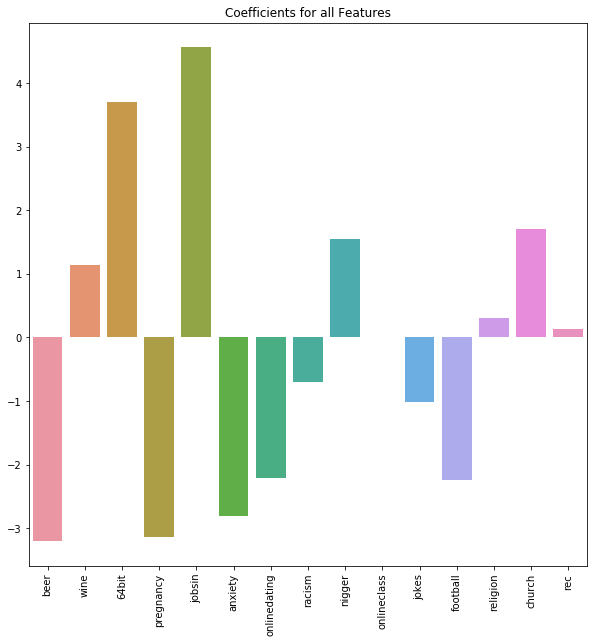

In [19]:
import matplotlib.pyplot as plt

dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
plt.title('Coefficients for all Features')
g = sns.barplot(ax=ax, x=indFeats, y=lm.coef_).set_xticklabels(rotation=90,labels=indFeats)

In [20]:
df.head()

,Year,State,Fiscal.Policy,Regulatory.Policy,Personal.Freedom,Economic.Freedom,Overall.Freedom,unemployment,beer,wine,...,anxiety,onlinedating,racism,nigger,onlineclass,jokes,football,religion,rec,highunem
169,2007,Maryland,0.111331,-0.272530,-0.096574,-0.161199,-0.257773,3.5,1.01,0.36,...,21.166667,20.750000,18.916667,14.416667,5.916667,23.166667,8.416667,26.916667,0,0
252,2009,Arizona,0.029623,0.189266,-0.059280,0.218889,0.159609,9.9,1.22,0.39,...,22.166667,7.750000,5.500000,9.083333,7.250000,25.416667,8.750000,30.333333,1,1
188,2007,Rhode Island,0.007382,-0.101207,0.005701,-0.093826,-0.088125,5.2,1.10,0.53,...,24.250000,24.500000,7.083333,18.750000,5.916667,23.500000,5.916667,27.166667,0,0
269,2009,Maryland,0.075596,-0.290543,-0.076858,-0.214948,-0.291805,7.0,0.96,0.36,...,24.500000,7.166667,17.500000,8.750000,8.000000,23.416667,9.250000,27.166667,1,0
445,2012,Virginia,0.182803,-0.004193,-0.056977,0.178609,0.121632,6.1,1.04,0.46,...,33.000000,7.416667,13.083333,10.166667,8.500000,20.583333,10.750000,31.333333,0,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


dfBoolY = df['highunem']
dt = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=12)
print(cross_val_score(dt, dfX, dfBoolY, cv=10))
mod = dt.fit(dfX,dfBoolY,)

[0.82926829 0.825      0.875      0.8        0.8        0.875
 0.85       0.8        0.875      0.8974359 ]


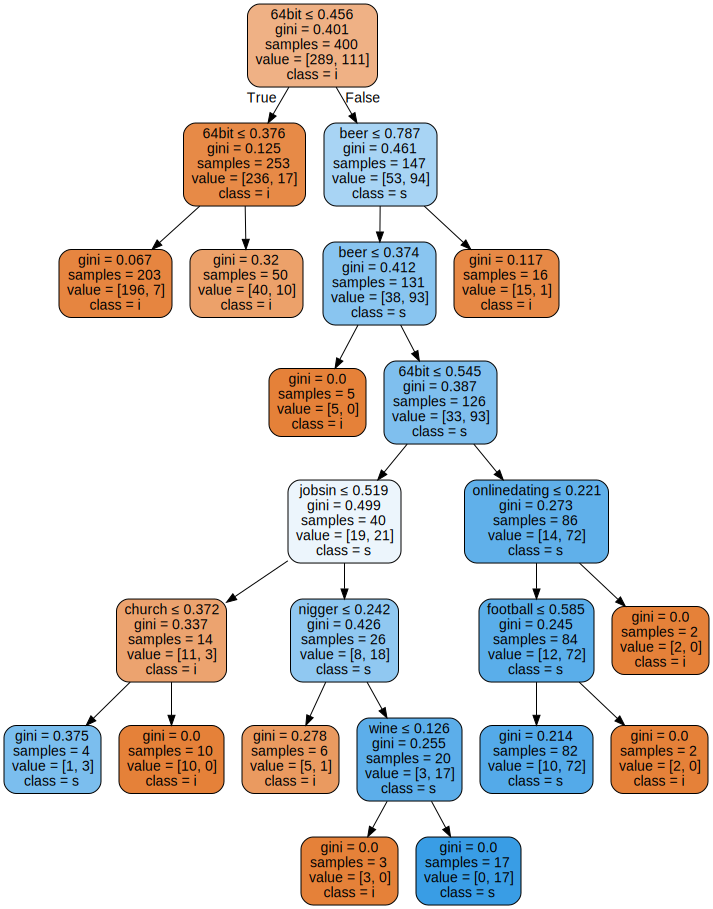

In [22]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(mod, out_file=None, 
                         feature_names=indFeats,  
                         class_names='isgritty',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

['beer', 'wine', '64bit', 'pregnancy', 'jobsin', 'anxiety', 'onlinedating', 'racism', 'nigger', 'onlineclass', 'jokes', 'football', 'religion', 'church', 'rec']
[0.08579451 0.03719047 0.30315086 0.04228451 0.10719793 0.06323548
 0.07768726 0.02478312 0.04745592 0.02168599 0.02730853 0.03331718
 0.02839404 0.05011598 0.05039821]


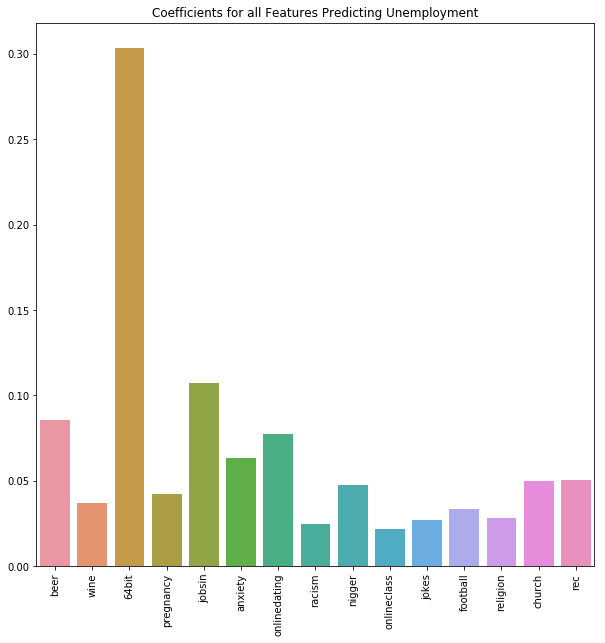

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,max_features=8,n_estimators=100)
rf.fit(dfX, dfY)

dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
plt.title('Coefficients for all Features Predicting Unemployment')
g = sns.barplot(ax=ax, x=indFeats, y=rf.feature_importances_).set_xticklabels(rotation=90,labels=indFeats)

print(indFeats)
print(rf.feature_importances_)

In [24]:
dfPred = rf.predict(df_test_X)
print("Mean squared error: %.2f" % mean_squared_error(np.array(df_test_Y),dfPred))
print("Mean absolute error: %.2f" % mean_absolute_error(np.array(df_test_Y),dfPred))

Mean squared error: 1.81
Mean absolute error: 1.00


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [42]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [43]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, dfX, dfY, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -1.94 (0.56) MSE


In [44]:
model = larger_model()
model.fit(dfX, dfY, epochs=1000, verbose=0)

In [45]:
dfPred = model.predict(df_test_X)
print("Mean squared error: %.2f" % mean_squared_error(np.array(df_test_Y),dfPred))
print("Mean absolute error: %.2f" % mean_absolute_error(np.array(df_test_Y),dfPred))

Mean squared error: 1.95
Mean absolute error: 1.08
